# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment 01
## Data preprocessing, model training and evaluation

This lab assignment consists of several parts.

In this part you are supposed to work with tabular data: make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
!pip install ucimlrepo

In [3]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [5]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

(846, 18) (846, 1)


### 1.1 Data integrity

Check if data is valid. If it is not, remove invalid parts.


In [6]:
feat = data.columns
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       845 non-null    float64
 1   CIRCULARITY                       846 non-null    int64  
 2   DISTANCE CIRCULARITY              846 non-null    int64  
 3   RADIUS RATIO                      846 non-null    int64  
 4   PR.AXIS ASPECT RATIO              846 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           846 non-null    int64  
 6   SCATTER RATIO                     846 non-null    int64  
 7   ELONGATEDNESS                     846 non-null    int64  
 8   PR.AXIS RECTANGULARITY            846 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         846 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  846 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  846 non-null    int64  
 12  SCALED R

In [8]:
# в одном из признаков есть null, найдем его и удалим
for i, val in enumerate(data[feat[0]].isna()):
    if val == True:
        print(data.iloc[i])
        print(i)
        break

COMPACTNESS                           NaN
CIRCULARITY                         100.0
DISTANCE CIRCULARITY                 36.0
RADIUS RATIO                         73.0
PR.AXIS ASPECT RATIO                199.0
MAX.LENGTH ASPECT RATIO              73.0
SCATTER RATIO                         6.0
ELONGATEDNESS                       162.0
PR.AXIS RECTANGULARITY               40.0
MAX.LENGTH RECTANGULARITY            20.0
SCALED VARIANCE ALONG MAJOR AXIS    127.0
SCALED VARIANCE ALONG MINOR AXIS    189.0
SCALED RADIUS OF GYRATION           401.0
SKEWNESS ABOUT MAJOR AXIS           125.0
SKEWNESS ABOUT MINOR AXIS            72.0
KURTOSIS ABOUT MINOR AXIS             6.0
KURTOSIS ABOUT MAJOR AXIS            19.0
HOLLOWS RATIO                       200.0
Name: 752, dtype: float64
752


In [9]:
pd.unique(target["class"])

array(['van', 'saab', 'bus', 'opel', '204'], dtype=object)

In [10]:
# '204' - что-то лишнее
for i, val in enumerate(target["class"]):
    if val == '204':
        print(i)

752


In [11]:
#т.е нужно удалить только 752 строку
data = data.drop(752)
target = target.drop(752)

### 1.2 Train and test sets

Split data into 2 groups using `sklearn`'s infrastructure.

Which size of test set to choose?

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [13]:
y_train = pd.Series(y_train["class"])
y_test = pd.Series(y_test["class"])

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(676, 18) (676,) (169, 18) (169,)


<Axes: xlabel='class', ylabel='Count'>

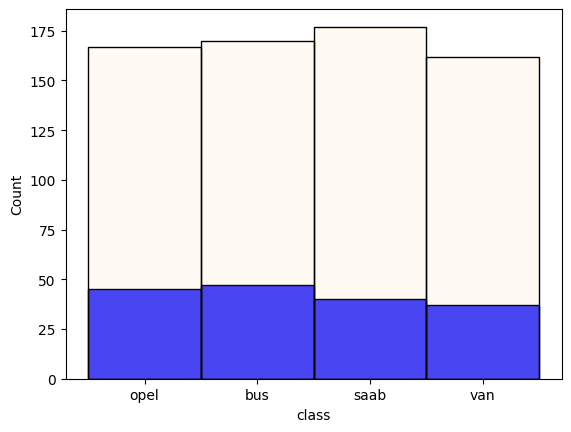

In [15]:
#рассмотрим данные на сбалансированность классов, все хорошо

import seaborn as sns
sns.histplot(data=y_test, color="blue")
sns.histplot(data=y_train, color="orange", alpha=0.05)

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [16]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
349,89.0,40,69,147,58,6,132,50,18,137,155,260,151,61,16,6,203,209
428,112.0,50,104,197,58,11,208,32,24,159,223,639,186,67,15,22,191,202
497,94.0,43,82,136,54,10,155,43,19,149,176,359,161,74,1,6,186,197
413,88.0,36,78,160,62,6,140,48,18,123,161,287,129,66,4,35,194,202
532,104.0,49,105,209,61,11,207,32,24,157,217,637,168,64,0,19,193,207
832,108.0,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199
265,80.0,45,71,128,56,7,151,45,19,147,171,337,176,79,3,16,181,187
427,86.0,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202
84,89.0,40,76,188,76,7,150,44,19,136,174,342,148,72,3,8,193,197
344,99.0,55,101,219,68,10,224,30,25,178,228,737,213,74,11,20,187,196


Methods `describe` and `info` deliver some useful information.

In [17]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,93.717456,44.849112,82.065089,168.863905,61.751479,8.658284,168.677515,41.013314,20.578402,147.989645,188.426036,439.235207,174.532544,72.510355,6.387574,12.640533,188.926036,195.674556
std,8.263174,6.274535,15.926830,33.984342,8.244077,4.821259,33.481398,7.894384,2.609625,14.744788,31.761129,177.758753,32.928436,7.757331,5.008209,8.999560,6.220671,7.511217
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.750000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,148.750000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,93.000000,44.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.500000,173.000000,71.500000,5.000000,11.000000,188.000000,197.000000
75%,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,198.250000,46.000000,23.000000,160.000000,217.000000,590.750000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,262.000000,61.000000,28.000000,188.000000,320.000000,998.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [18]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 349 to 348
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       676 non-null    float64
 1   CIRCULARITY                       676 non-null    int64  
 2   DISTANCE CIRCULARITY              676 non-null    int64  
 3   RADIUS RATIO                      676 non-null    int64  
 4   PR.AXIS ASPECT RATIO              676 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           676 non-null    int64  
 6   SCATTER RATIO                     676 non-null    int64  
 7   ELONGATEDNESS                     676 non-null    int64  
 8   PR.AXIS RECTANGULARITY            676 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         676 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  676 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  676 non-null    int64  
 12  SCALED RADI

## 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

### 2.0. Data preprocessing

Apply transformations to the dataset (if necessary).

Briefly explain the transformations

In [19]:
### YOUR CODE HERE
#отнормируем данные для логистической регрессии и pca

from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
encoder = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [20]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02
mean,-6.989806e-16,-1.103654e-16,-1.773729e-16,-2.483221e-16,4.283227e-16,4.992719e-17,-2.286140e-16,3.849649e-16,6.832142e-17,7.567911e-16,3.271545e-16,4.467170e-17,1.997088e-16,3.626291e-16,5.255494e-17,-7.094916e-17,1.644969e-15,-4.204395e-17
std,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00
min,-2.509060e+00,-1.889843e+00,-2.643102e+00,-1.910054e+00,-1.790668e+00,-1.382049e+00,-1.694060e+00,-1.903180e+00,-1.372248e+00,-2.035421e+00,-1.840907e+00,-1.436915e+00,-1.900450e+00,-1.742914e+00,-1.276365e+00,-1.405612e+00,-2.079455e+00,-1.955132e+00
25%,-8.135408e-01,-7.733964e-01,-7.580933e-01,-8.278731e-01,-5.767774e-01,-3.442072e-01,-6.778184e-01,-1.015817e+00,-6.052867e-01,-7.458759e-01,-6.750988e-01,-6.881558e-01,-7.835670e-01,-7.108676e-01,-8.767252e-01,-7.384194e-01,-7.924681e-01,-7.560371e-01
50%,-8.688996e-02,-1.354270e-01,-1.925906e-01,-5.488661e-02,-9.122133e-02,-1.366389e-01,-3.490345e-01,2.518445e-01,-2.218061e-01,-1.350388e-01,-3.285071e-01,-4.320014e-01,-4.657613e-02,-1.303416e-01,-2.772651e-01,-1.824253e-01,-1.489745e-01,1.765926e-01
75%,7.608694e-01,8.215272e-01,1.001248e+00,7.696323e-01,3.943347e-01,2.784977e-01,8.839052e-01,6.321429e-01,9.286358e-01,8.151523e-01,9.003182e-01,8.529931e-01,7.132083e-01,4.501843e-01,5.220151e-01,7.071653e-01,6.553925e-01,7.095238e-01
max,3.061930e+00,2.256959e+00,1.880919e+00,4.833333e+00,9.255733e+00,9.619070e+00,2.789357e+00,2.533635e+00,2.846039e+00,2.715535e+00,4.145677e+00,3.145716e+00,2.719039e+00,8.061525e+00,3.119675e+00,3.153539e+00,2.746747e+00,2.041852e+00


### 2.1. Basic logistic regression

* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [21]:
### YOUR CODE HERE

#find best hyperparams

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logReg = LogisticRegression(solver="saga", tol=1e-3, max_iter=500)

params = {'penalty' : ["elasticnet"],
          "C": [0.1, 0.5, 1, 10, 100], 
          'l1_ratio' : [0, 0.25, 0.5, 0.75, 1]}

logReg_grid = GridSearchCV(estimator=logReg, param_grid=params, scoring="accuracy")
logReg_grid.fit(X_train, y_train)
logReg_grid.best_params_

{'C': 10, 'l1_ratio': 0.75, 'penalty': 'elasticnet'}

In [22]:
#estimate the quality 

from sklearn.metrics import f1_score, accuracy_score

logReg_best = logReg_grid.best_estimator_
y_pred = logReg_best.predict(X_test)

f1 = f1_score(y_test, y_pred, average="macro")
acc = accuracy_score(y_test, y_pred)

print(f"\nf1: {f1:.3f}")
print(f"acc: {acc:.3f}")


f1: 0.782
acc: 0.781


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

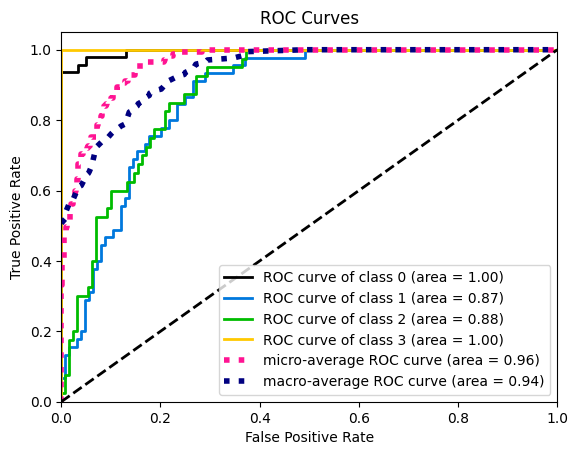

In [23]:
#roc-curve, trick with library from tg was used

from scikitplot.metrics import plot_roc

plot_roc(y_test, logReg_best.predict_proba(X_test))

In [24]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

### 2.2. PCA: explained variance plot

Apply the PCA to the train part of the data.

Build the explaided variance plot.

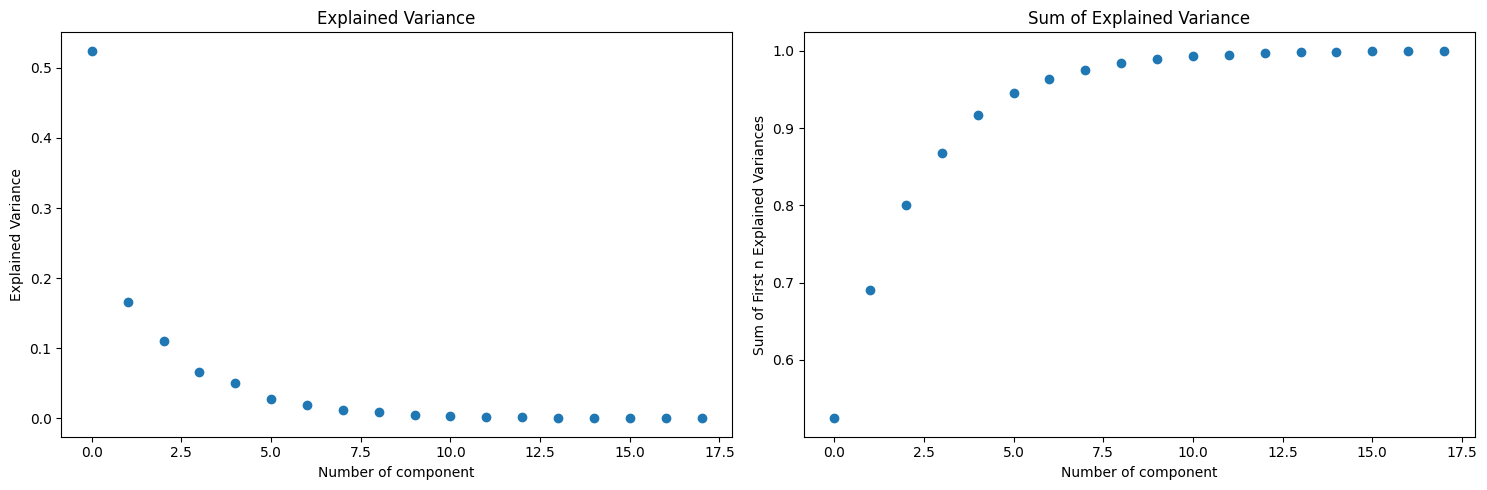

In [25]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

exp_var = pca.explained_variance_ratio_
sum_var = exp_var.cumsum()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Explained Variance")
plt.scatter(range(0, len(exp_var)), exp_var)
plt.xlabel("Number of component")
plt.ylabel("Explained Variance")

plt.subplot(1, 2, 2)
plt.title("Sum of Explained Variance")
plt.scatter(range(0, len(exp_var)), sum_var)
plt.xlabel("Number of component")
plt.ylabel("Sum of First n Explained Variances")

plt.tight_layout()
plt.show()



### 2.3. PCA trasformation

Select the appropriate number of components.

Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train`, `val` and `test` parts.*

In [26]:
### YOUR CODE HERE
print(f"sum of exp_var:{sum_var}")

sum of exp_var:[0.52438881 0.69034136 0.80083222 0.86734032 0.91711622 0.94478934
 0.96354106 0.97523193 0.98424117 0.98921161 0.99264397 0.99498706
 0.99688648 0.9980693  0.99893739 0.99964237 0.9999803  1.        ]


In [27]:
# choose n where sum_var(n) > 0.95 (basic value)
n = np.argmax(sum_var >= 0.95) + 1

pca = PCA(n_components=n)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

### 2.4. Logistic regression on PCA-preprocessed data

* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.
* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [28]:
### YOUR CODE HERE

clf = LogisticRegression(solver="saga", tol=1e-3, max_iter=500)

params = {'penalty' : ["elasticnet"],
          "C": [0.1, 0.5, 1, 10, 100], 
          'l1_ratio' : [0, 0.25, 0.5, 0.75, 1]}

clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring="accuracy")
clf_grid.fit(X_train_pca, y_train)
clf_grid.best_params_

{'C': 0.5, 'l1_ratio': 1, 'penalty': 'elasticnet'}

In [29]:
#estimate the quality 

from sklearn.metrics import f1_score, accuracy_score

clf_best = clf_grid.best_estimator_
y_pred = clf_best.predict(X_test_pca)

f1 = f1_score(y_test, y_pred, average="macro")
acc = accuracy_score(y_test, y_pred)

print(f"\nf1: {f1:.3f}")
print(f"acc: {acc:.3f}")


f1: 0.636
acc: 0.657


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

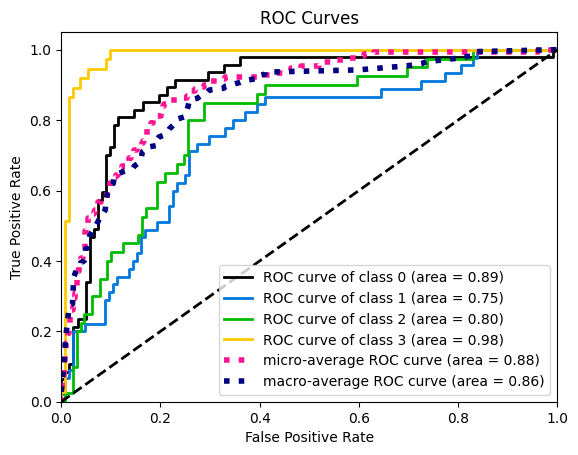

In [30]:
#roc-curve, trick with library from tg was used

from scikitplot.metrics import plot_roc

plot_roc(y_test, clf_best.predict_proba(X_test_pca))

### 2.5. Decision tree

* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.


Best parameters: {'max_depth': 13}

F1: 0.646
Accuracy: 0.639


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

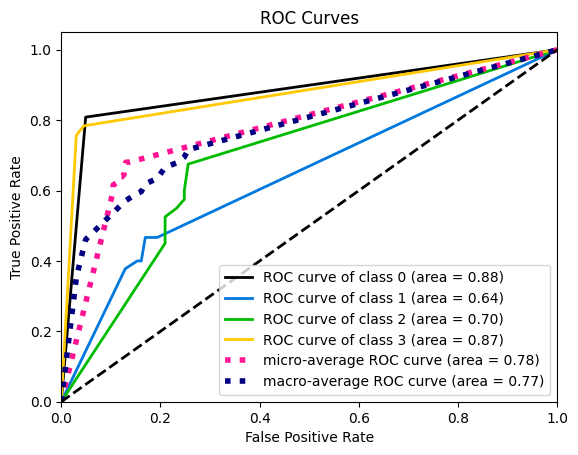

In [31]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

tree = DecisionTreeClassifier(criterion="entropy", splitter="best")

params = {"max_depth": np.arange(1, 20, 1)}

tree_grid = GridSearchCV(
    estimator=tree,
    param_grid=params,
    scoring="accuracy",
)

tree_grid.fit(X_train_pca, y_train)

tree_best = tree_grid.best_estimator_

y_pred = tree_best.predict(X_test_pca)

f1 = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

print(f"\nBest parameters: {tree_grid.best_params_}")
print(f"\nF1: {f1:.3f}")
print(f"Accuracy: {acc:.3f}")

plot_roc(y_test, tree_best.predict_proba(X_test_pca))

### 2.6. Bagging

Here starts the ensembling part. You need to use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ with step 5.

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [32]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

def bagging(estimator, n_estim):
    clf = BaggingClassifier(estimator=estimator, n_estimators=n_estim, bootstrap=True, max_samples=0.8, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    acc = accuracy_score(y_test, y_pred)
    return [f1, acc]

def foo(estimator, N=np.arange(2, 500, 5)):
    f1 = []
    acc = []
    
    for i in N:
        res = bagging(estimator, i)
        f1.append(res[0])
        acc.append(res[1])

    return (f1, acc)

Text(0.5, 1.0, 'Accuracy for Tree')

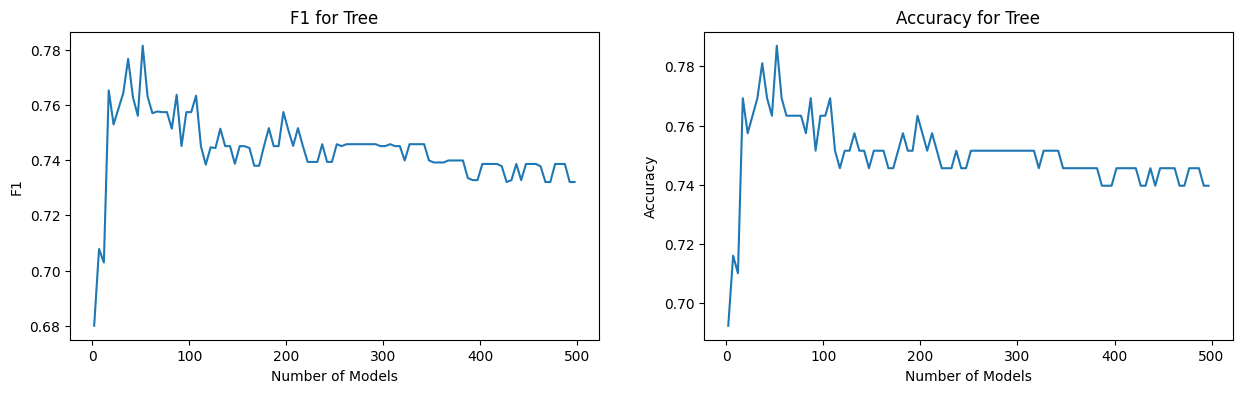

In [33]:
res_tree = foo(DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=13))

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(2, 500, 5), res_tree[0])
plt.xlabel("Number of Models")
plt.ylabel("F1")
plt.title("F1 for Tree")

plt.subplot(1, 2, 2)
plt.plot(np.arange(2, 500, 5), res_tree[1])
plt.xlabel("Number of Models")
plt.ylabel("Accuracy")
plt.title("Accuracy for Tree")

С 80 график выходит на насыщение

Text(0.5, 1.0, 'Accuracy for logReg')

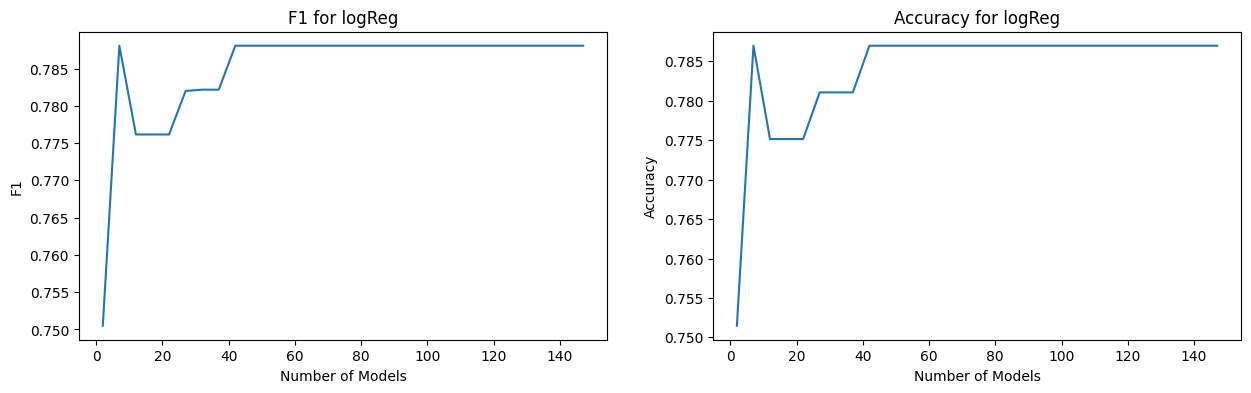

In [34]:
import warnings
warnings.filterwarnings("ignore")


res_logReg = foo(LogisticRegression(solver="saga", tol=1e-3, max_iter=500, C=10, l1_ratio=1, penalty="elasticnet"), np.arange(2, 150, 5))

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(2, 150, 5), res_logReg[0])
plt.xlabel("Number of Models")
plt.ylabel("F1")
plt.title("F1 for logReg")

plt.subplot(1, 2, 2)
plt.plot(np.arange(2, 150, 5), res_logReg[1])
plt.xlabel("Number of Models")
plt.ylabel("Accuracy")
plt.title("Accuracy for logReg")

С 90 график выходит на насыщение

### 2.7. Random Forest

Now we will work with the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

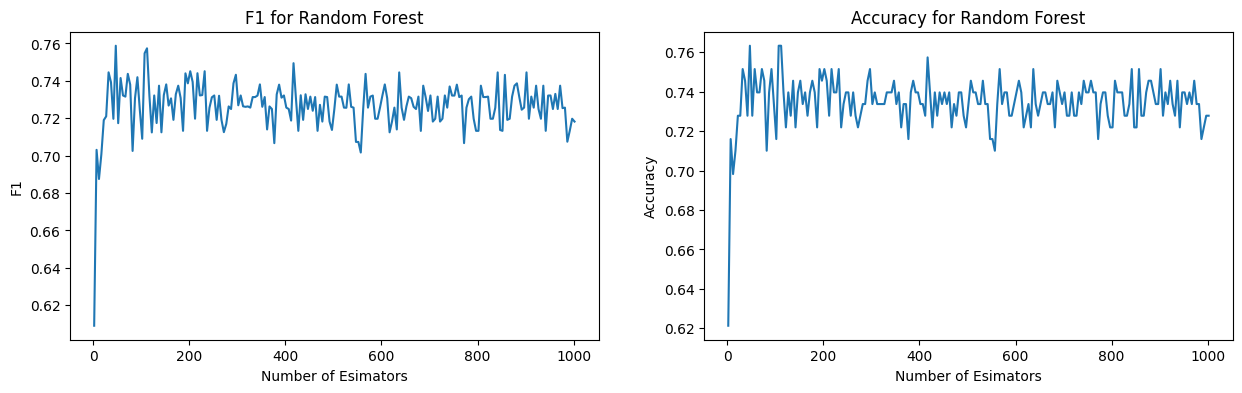

In [35]:
from sklearn.ensemble import RandomForestClassifier

N = np.arange(2, 1003, 5)

f1_forest = []
accuracy_forest = []

for i in N:
    forest = RandomForestClassifier(
        n_estimators=i,
        criterion="entropy",
        max_depth=13
    )

    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)

    f1_forest.append(f1)
    accuracy_forest.append(accuracy)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(N, f1_forest)
plt.xlabel("Number of Esimators")
plt.ylabel("F1")
plt.title("F1 for Random Forest")

plt.subplot(1, 2, 2)
plt.plot(N, accuracy_forest)
plt.xlabel("Number of Esimators")
plt.ylabel("Accuracy")
plt.title("Accuracy for Random Forest")

plt.show()

### 2.8. Learning curve

Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected. First train it on first part, then on first and second parts combined (so the train size in increased by 2 times), first 3 parts and so on.

* You may use `sklearn`'s [readymade function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html). But note that you need to adjust parameters of this function appropriately.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score vs dataset size).

* Analyse the final plot. Can you make any conlusions using it?

In [36]:
def f(model):
    f1 = []
    acc = []
    size = [int(X_train.shape[0] * i / 10) for i in range(1, 11)]

    for i in range(0, 10):
        X_train_part = X_train[:size[i]]
        y_train_part = y_train[:size[i]]

        model.fit(X_train_part, y_train_part)
        y_pred = model.predict(X_test)

        f1.append(f1_score(y_test, y_pred, average="macro"))
        acc.append(accuracy_score(y_test, y_pred))

    return(f1, acc)

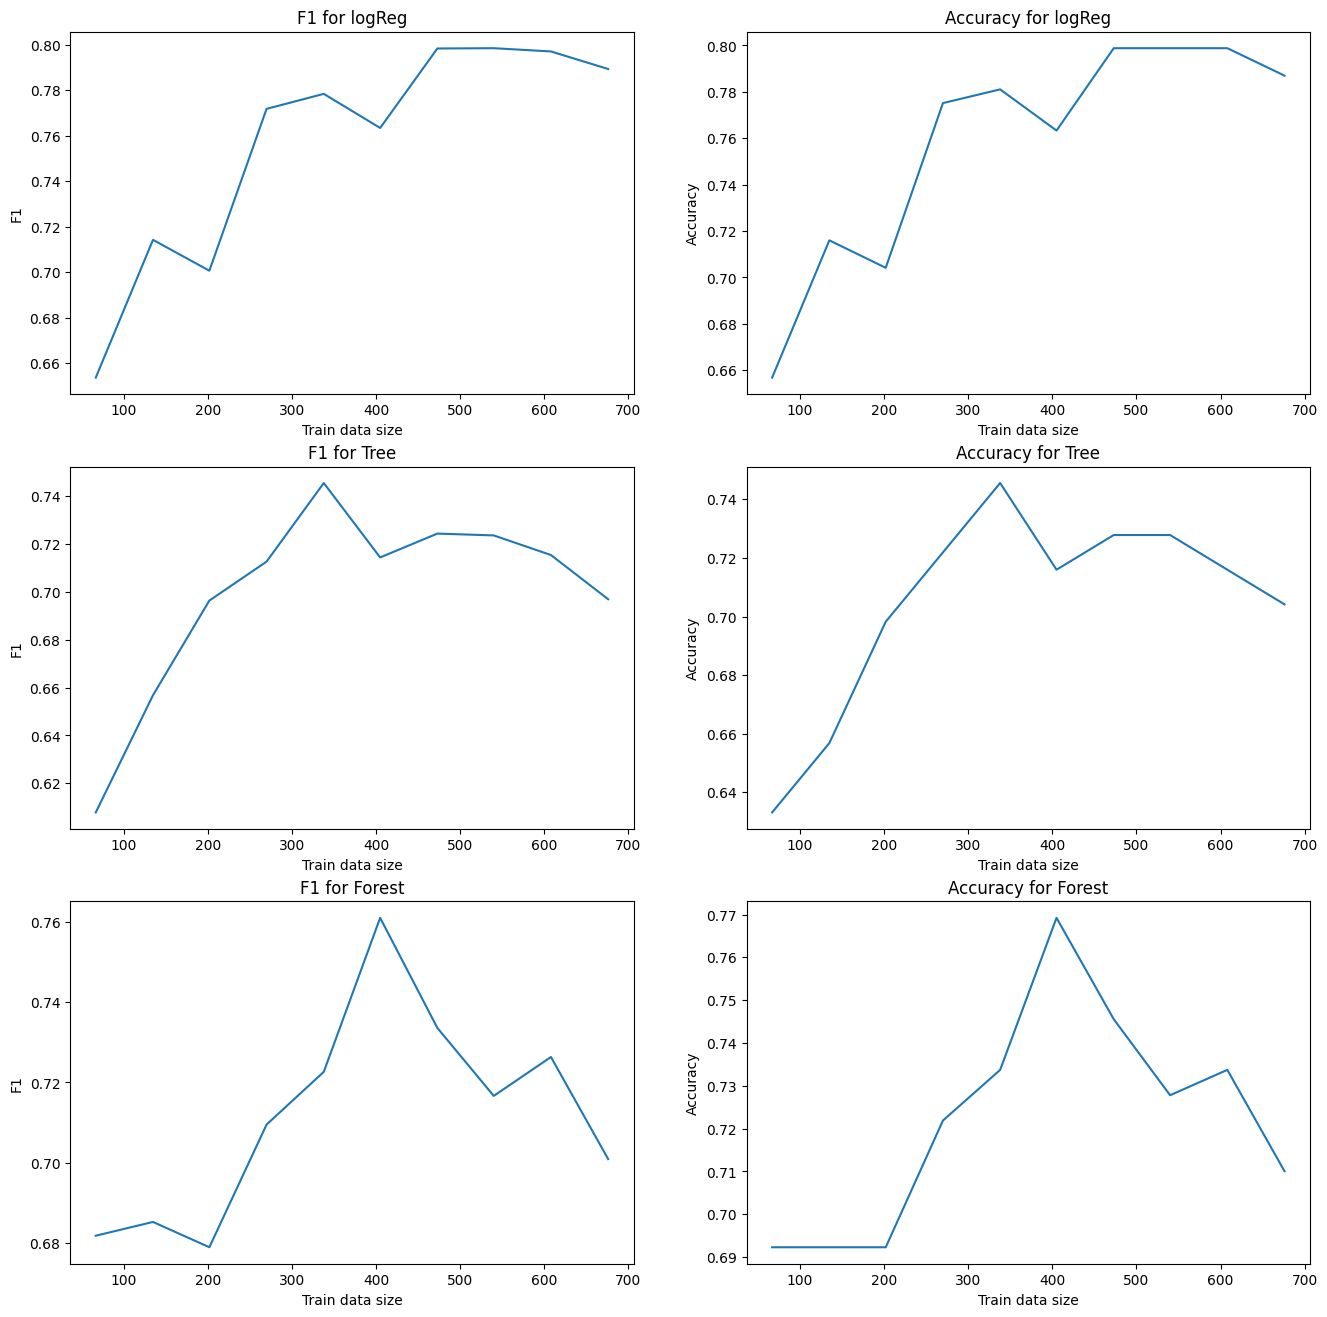

In [37]:
models = [
          LogisticRegression(solver="saga", tol=1e-3, max_iter=500, C=1, l1_ratio=1, penalty="elasticnet"),
          DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=13),
          RandomForestClassifier(n_estimators=500, criterion="entropy", max_depth=13, max_samples=0.8)
         ]

labels = ['logReg', 'Tree', 'Forest']

plt.figure(figsize=(16, 16))

size = [int(X_train.shape[0] * i / 10) for i in range(1, 11)]

for i in range(0, 3):
    res = f(models[i])

    plt.subplot(3, 2, i*2 + 1)
    plt.plot(size, res[0])
    plt.xlabel("Train data size")
    plt.ylabel("F1")
    plt.title(f"F1 for {labels[i]}")
    
    plt.subplot(3, 2, i*2 + 2)
    plt.plot(size, res[1])
    plt.xlabel("Train data size")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy for {labels[i]}")

С ростом кол-ва данных растут метрики, что логично. Для леса случилось что-то странное, возможно, это связано с кол-вом данных.

### 2.9. Boosting

Apply [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to this problem.

Find optimal hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or RandomizedSearchCV.

Hyperparameters to consider:
* depth of each tree
* number of decision trees
* learning rate

In [38]:
# YOUR CODE HERE

from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier()
boost_param = {
    "max_depth": range(2, 15, 3),
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.01, 0.1, 1, 10]
}

grid_boost = GridSearchCV(
    estimator=boost, 
    param_grid=boost_param,
    scoring="accuracy",
)

grid_boost.fit(X_train, y_train)

print(f"Best parameters: {grid_boost.best_params_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [39]:
y_pred = grid_boost.best_estimator_.predict(X_test)

f1 = f1_score(y_test, y_pred, average="macro")
acc = accuracy_score(y_test, y_pred)

print(f"\nf1: {f1:.3f}")
print(f"acc: {acc:.3f}")


f1: 0.756
acc: 0.757
